(ref:lec2:ex3_sol)=
# Solutions of Exercise 2.3


```{figure} res/ex3.svg
---
height: 200px
name: fig:lec2:ex3_sol
---
Closed-loop system
```

Depicted above is the block diagram of a closed-loop system.

1. For what values of the controller parameter $K$ is the closed-loop stable?
2. Is there any value of $K$ such that the closed-loop can track the reference signal $r(t) = 0.1 \textrm{ramp}(t)$ with an error less than $5 \cdot 10^{-3}$? 

---

## Solution

### Question 1

The open-loop transfer function of the system is 

$$
G_o(s) = K \frac{1}{s(s+1)(s+2)}
$$

The closed-loop transfer function is

$$
G_c(s) = \frac{G_o(s)}{1 + G_o(s)} = \frac{K}{s^3 + 3s^2 + 2s + K}
$$

Unfortunately, $G_c(s)$ is a third-order transfer function, therefore we cannot analytically inspect how the poles of $G_c(s)$ change as a function of $K$.

Two approaches can be used to solve the exercise:
- Using the [Routh stability criterion](https://en.wikipedia.org/wiki/Routh–Hurwitz_stability_criterion#Higher-order_example)
- Using the rootlocus

Because the former is out of the scope of this course, we will go for the second one. Let's plot the root locus of $G_o(s)$

In [1]:
set(groot, 'defaultLineLineWidth', 2);

In [2]:
s = tf('s');
Go = 1/(s*(s+1)*(s+2));

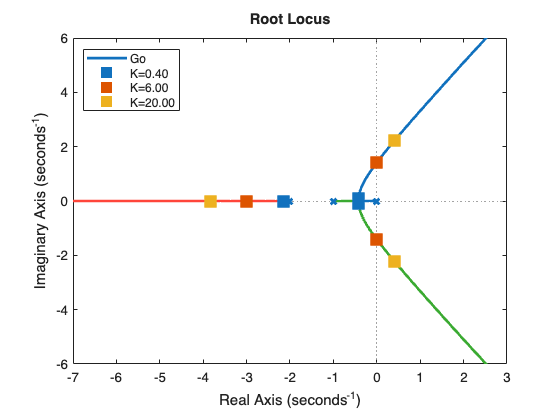

In [3]:
rlocus(Go); hold on; % Plot the root locus

% Plot the closed-loop poles for specific values of K
K_points = [0.4, 6, 20];
for k=K_points
    Gok = k * Go;
    [num, den] = tfdata(Gok, "vector");
    poles = roots(num + den);
    p = plot(real(poles), imag(poles), 's', 'MarkerSize', 10, 'MarkerFaceColor', 'auto', 'DisplayName', sprintf('K=%.2f', k));
    set(p, 'markerfacecolor', get(p, 'color'));
end
legend('Location', 'northwest'); hold off;

Note that:

- For $0 < K \leq 0.4$, the closed-loop are real-valued and negative
- For $0.4 < K < 6$ we have 1 real-valued negative pole and two complex-conjugate (dominating) poles with negative real part.
- For $K >6$ the two complex-conjugate poles have positive real part, so the closed-loop is unstable.

The solution is therefore $0 < K < 6$.

### Question 2

Under the assumption that the closed-loop is stable ($0 < K < 6$), we can apply the Final Value Theorem, where the reference is $R(s) = \frac{0.1}{s^2}$.

Recalling that Laplace transform of the error is $E(s) = R(s) - Y(s) = (1 - G_c(s)) R(s)$,

$$
\begin{aligned}
\lim_{t \to \infty} e(t) = \lim_{s \to 0} s \left[ 1 - G_c(s)  \right] \frac{0.1}{s^2} &= \lim_{s \to 0} s \frac{s^3 + 3 s^2 + 2s }{s^3 + 3 s^2 + 2s + K} \frac{0.1}{s^2} \\
&= \lim_{s \to 0} \frac{s^2 + 3 s + 2 }{s^3 + 3 s^2 + 2s + K} 0.1 = \frac{0.2}{K}
\end{aligned}
$$

To get the desired error, we impose 

$$
\frac{0.2}{K} \leq 0.005 \quad \implies \quad K \geq 40
$$

Unfortunately, this error is not achievable because for $K > 6$ the closed-loop is unstable.